Credits :
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009


In [142]:
# Import the datset and libraries
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
wine = load_wine()

#Create Data Frame
df = pd.DataFrame(wine.data,columns= wine.feature_names)
df['target'] = wine.target

print(df.head())

   alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
0    14.23        1.71  2.43  ...                          3.92   1065.0       0
1    13.20        1.78  2.14  ...                          3.40   1050.0       0
2    13.16        2.36  2.67  ...                          3.17   1185.0       0
3    14.37        1.95  2.50  ...                          3.45   1480.0       0
4    13.24        2.59  2.87  ...                          2.93    735.0       0

[5 rows x 14 columns]


In [143]:
df.tail()

alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  target
173    13.71        5.65  2.45  ...                          1.74    740.0       2
174    13.40        3.91  2.48  ...                          1.56    750.0       2
175    13.27        4.28  2.26  ...                          1.56    835.0       2
176    13.17        2.59  2.37  ...                          1.62    840.0       2
177    14.13        4.10  2.74  ...                          1.60    560.0       2

[5 rows x 14 columns]

In [144]:
df.shape #View the shape

(178, 14)

In [145]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [146]:
# Check for null vlaues
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [147]:
# Get Summary Stastics
df.describe()

alcohol  malic_acid  ...      proline      target
count  178.000000  178.000000  ...   178.000000  178.000000
mean    13.000618    2.336348  ...   746.893258    0.938202
std      0.811827    1.117146  ...   314.907474    0.775035
min     11.030000    0.740000  ...   278.000000    0.000000
25%     12.362500    1.602500  ...   500.500000    0.000000
50%     13.050000    1.865000  ...   673.500000    1.000000
75%     13.677500    3.082500  ...   985.000000    2.000000
max     14.830000    5.800000  ...  1680.000000    2.000000

[8 rows x 14 columns]

In [148]:
# Get the counts of target
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [149]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

EDA

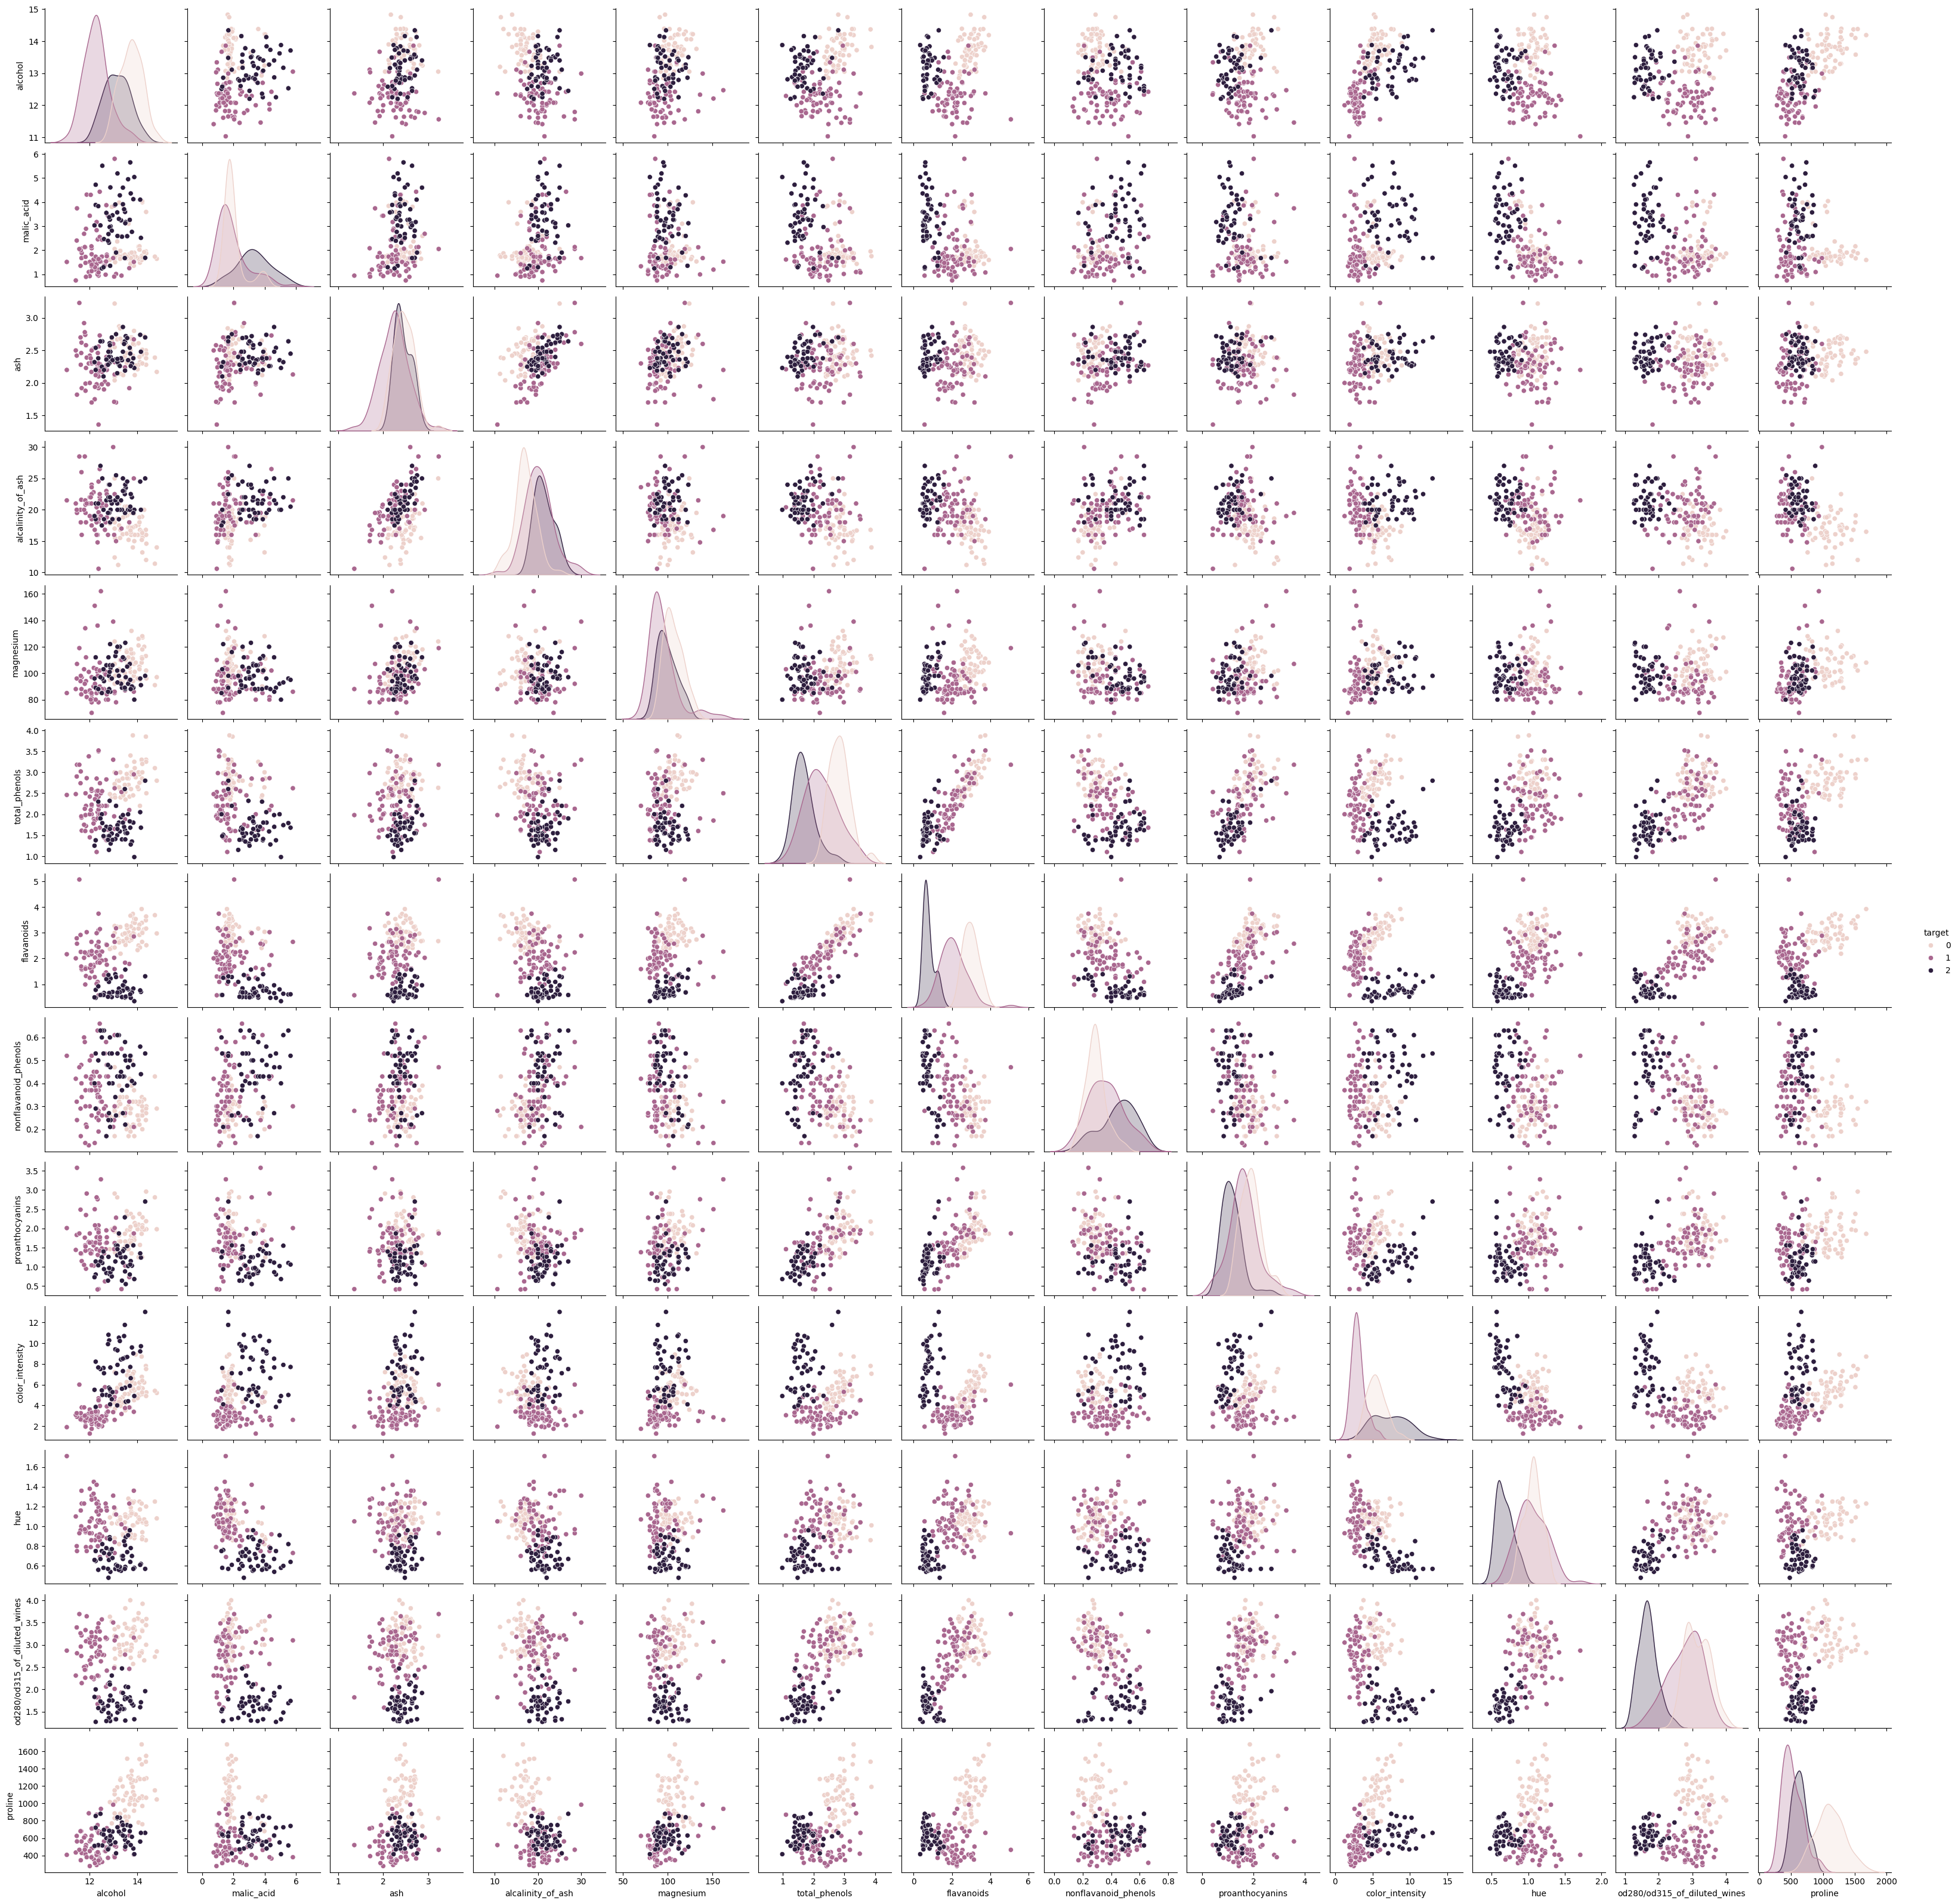

In [150]:
sns.pairplot(data=df, hue='target')
plt.show()

/var/folders/2z/q1dh9xf94t90cdmnnxxh8pv80000gn/T/ipykernel_892/2962234487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='muted')


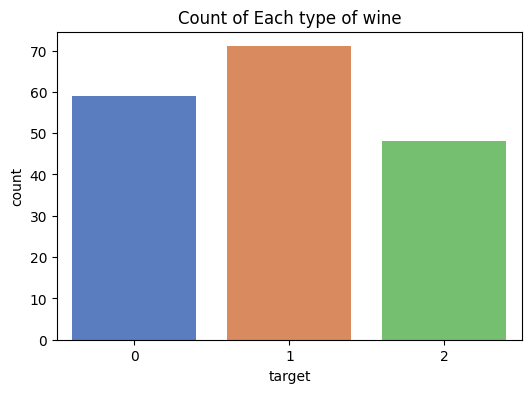

In [151]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target', palette='muted')
plt.title("Count of Each type of wine")
plt.show()

In [152]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

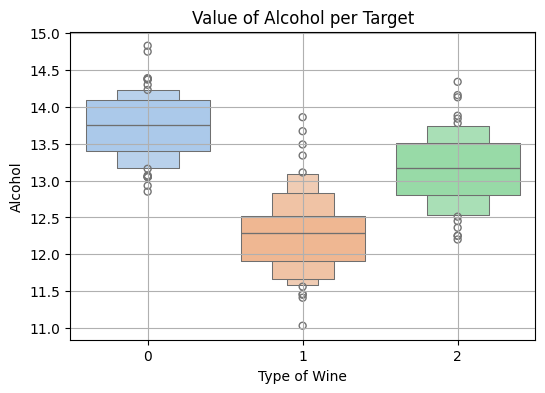

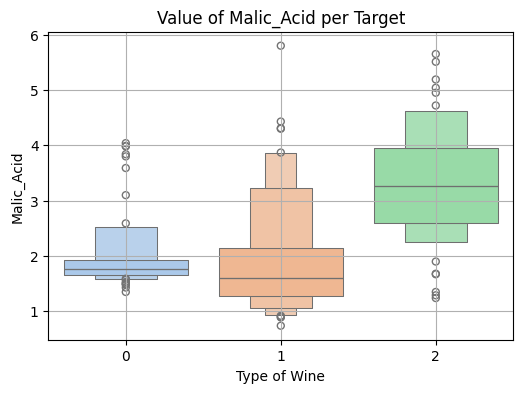

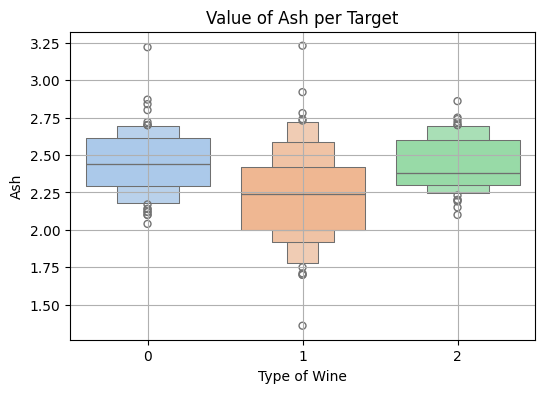

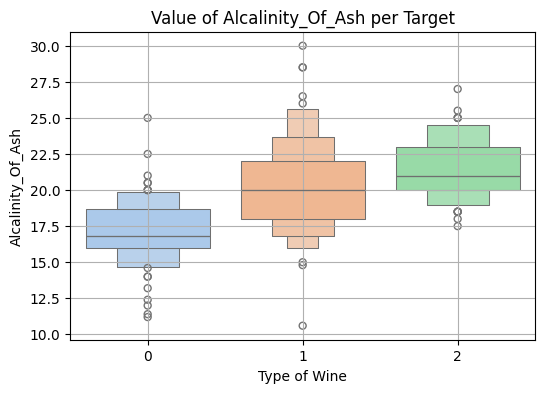

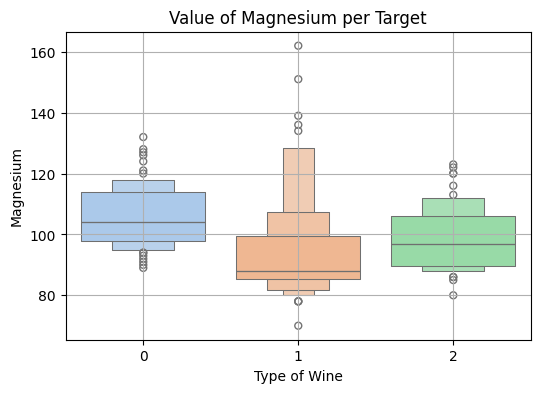

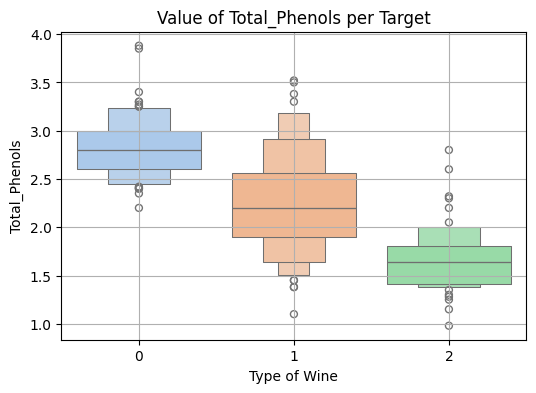

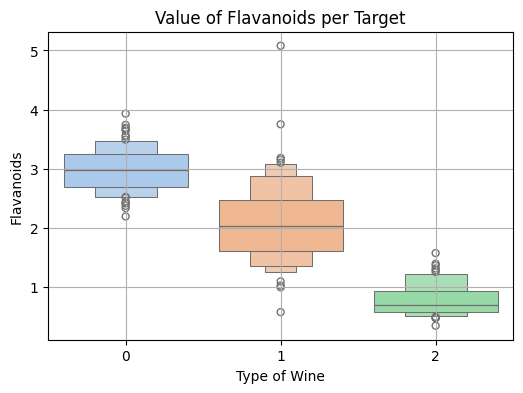

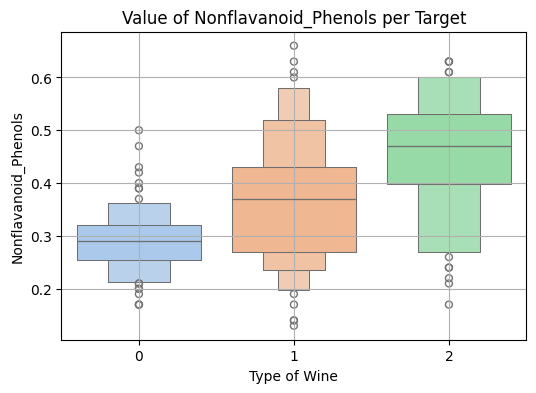

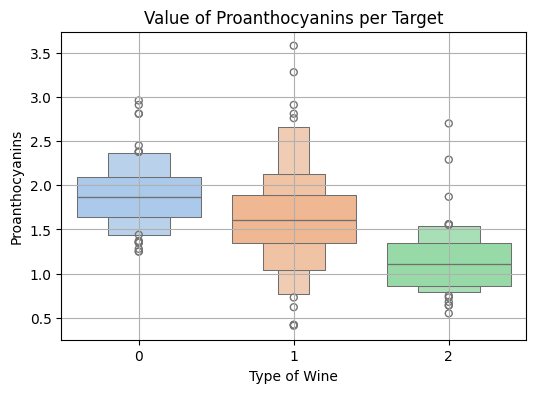

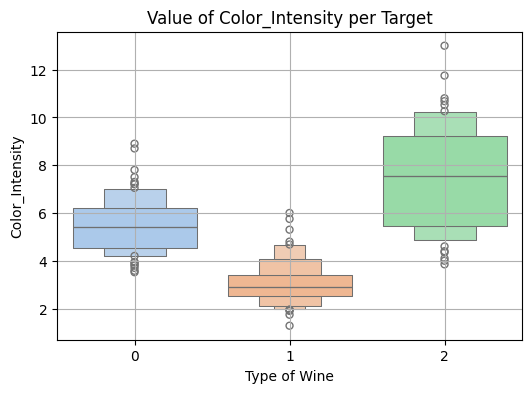

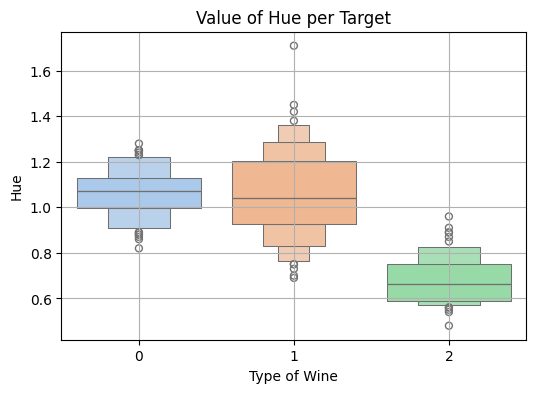

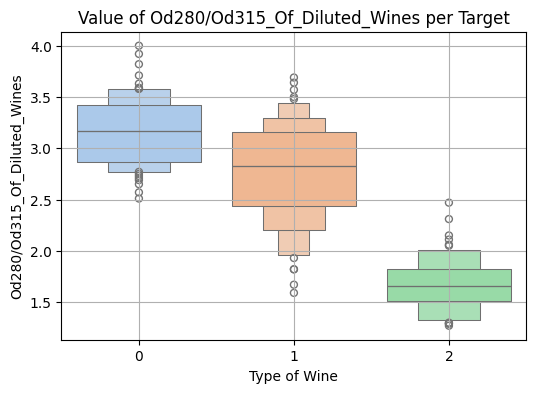

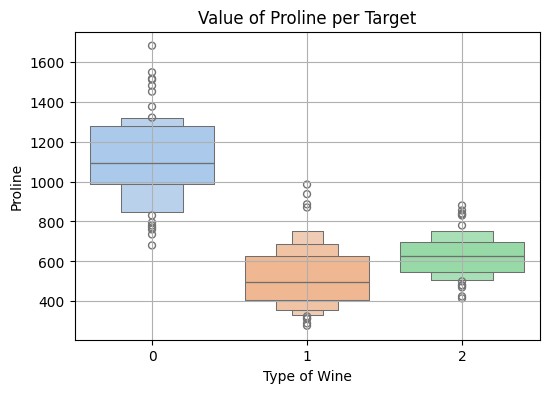

In [153]:
# Get each feature value in each type of wine
feature_cols = [ i for i in df.columns]
for col in feature_cols[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxenplot(data=df, x='target', y=col,hue="target",legend=False, palette='pastel')
    plt.title(f"Value of {col.title()} per Target")
    plt.xlabel("Type of Wine")
    plt.ylabel(col.title())
    plt.grid(True)
    plt.show()

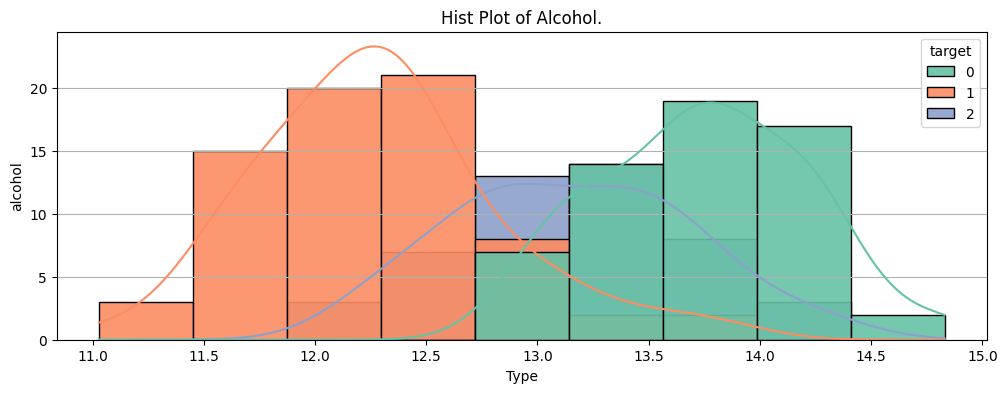

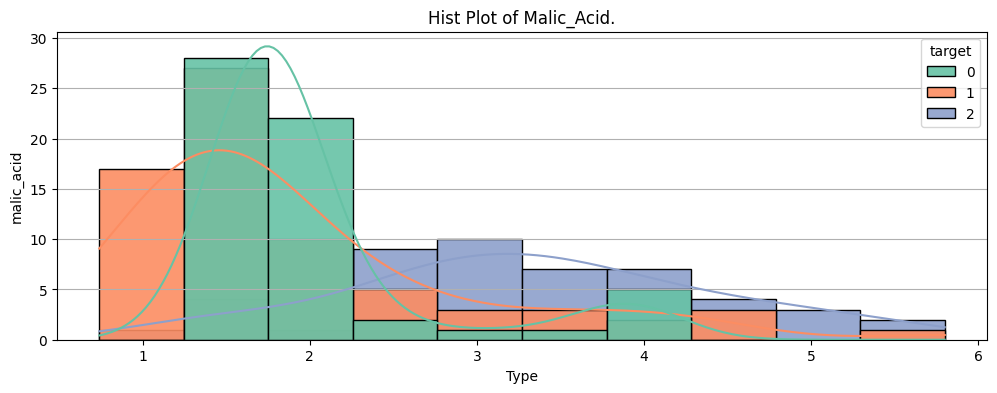

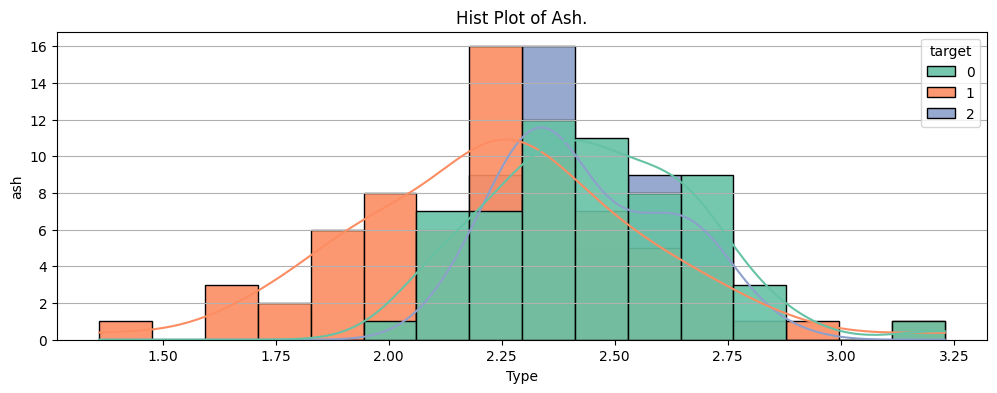

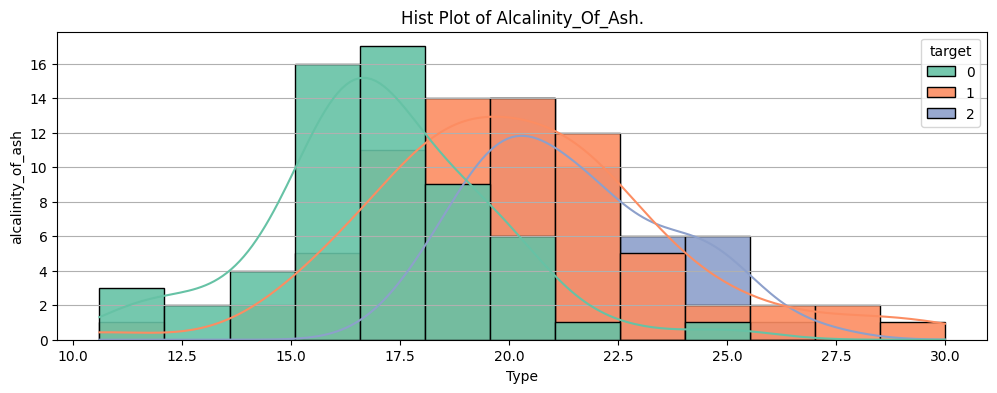

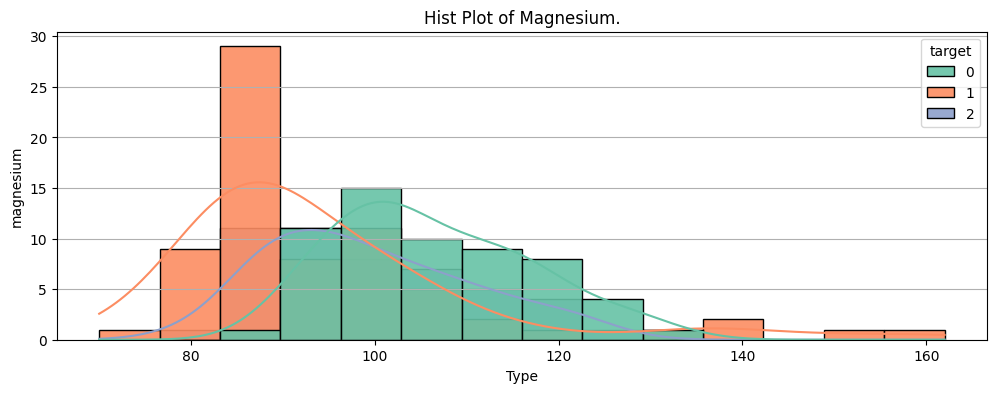

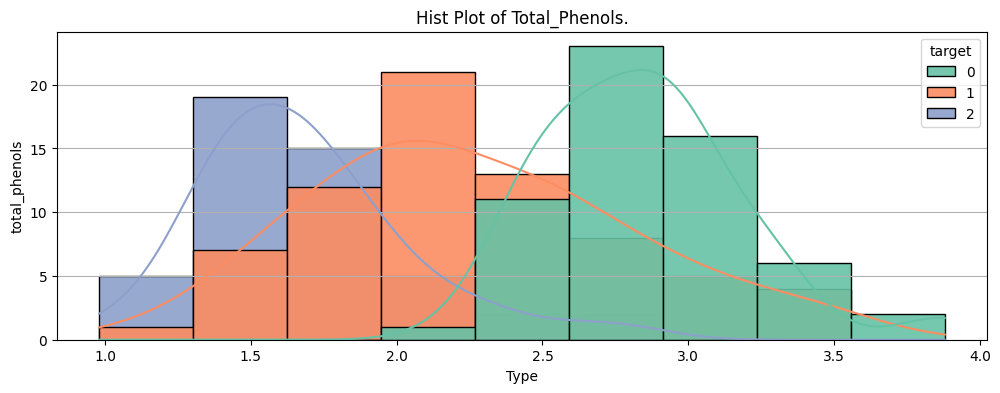

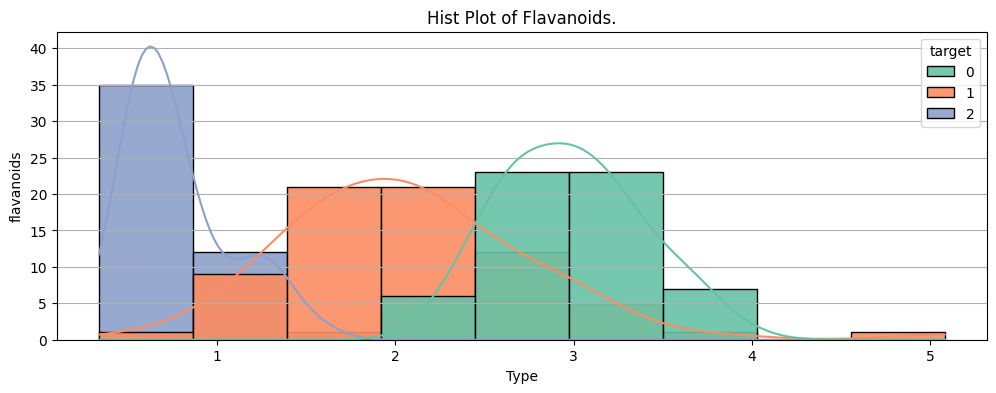

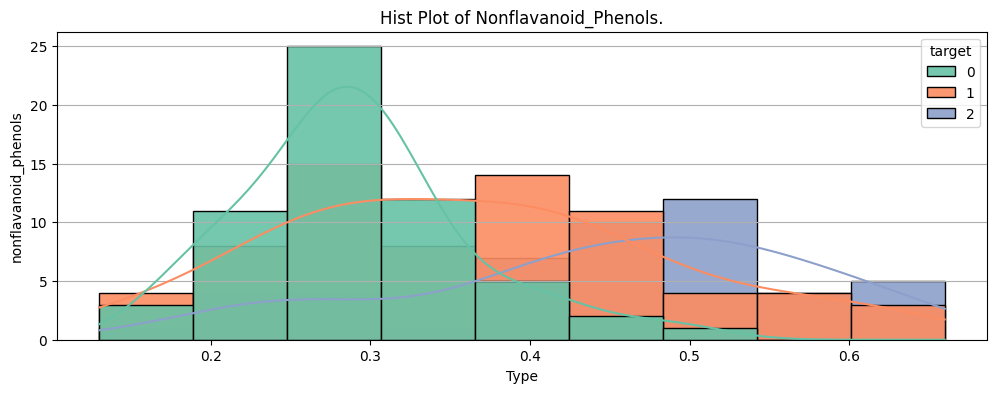

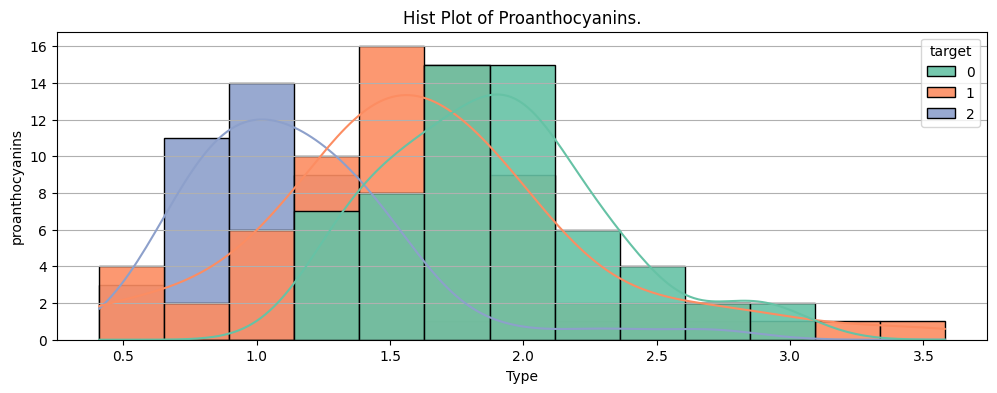

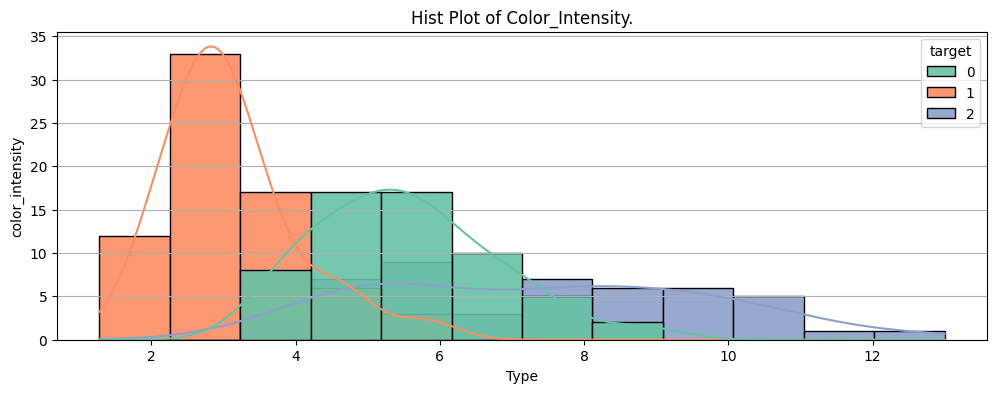

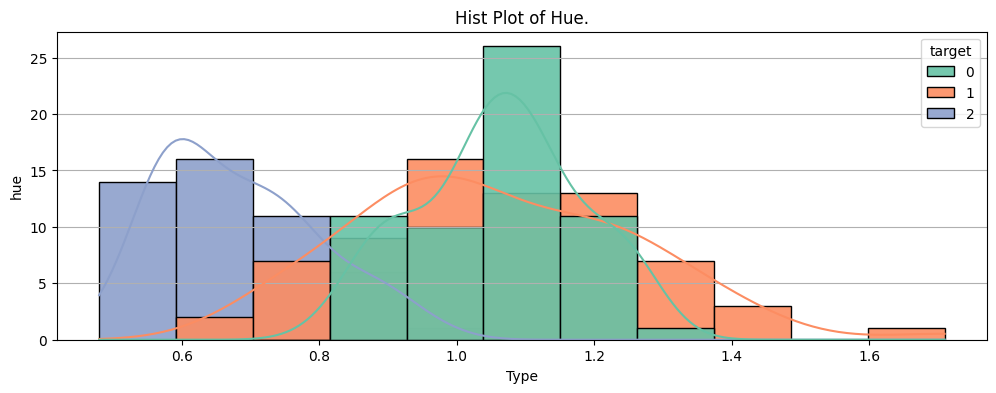

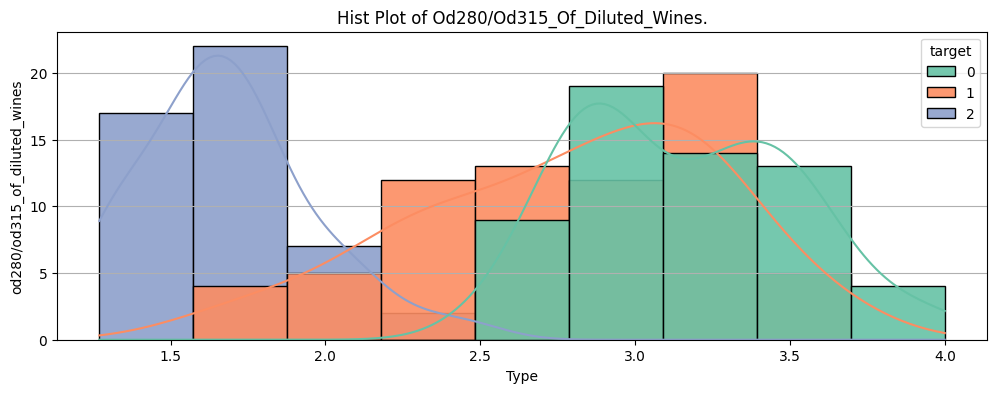

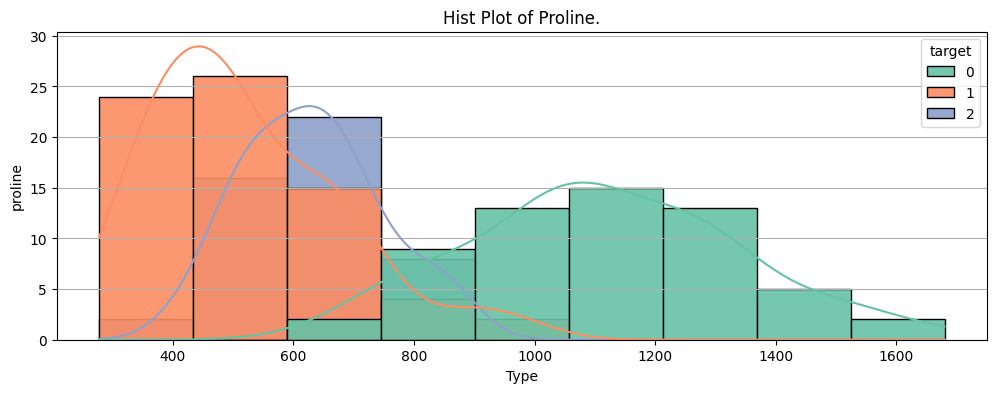

In [154]:
# Hist plot of each wine type 
for feature in feature_cols[:-1]:
    plt.figure(figsize=(12,4))
    sns.histplot(data=df, x=feature, hue='target', palette='Set2', kde=True, alpha = 0.9)
    plt.title(f"Hist Plot of {feature.title()}.")
    plt.grid(axis='y')
    plt.xlabel("Type")
    plt.ylabel(feature)
    plt.show()

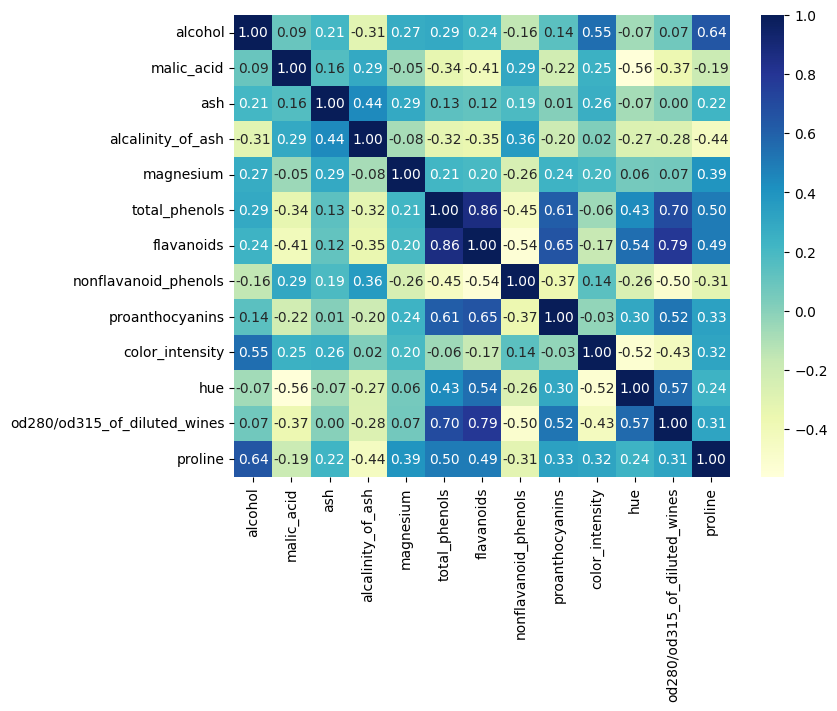

In [155]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('target', axis=1).corr(), annot=True, fmt='.2f', cmap="YlGnBu")
plt.show()

In [156]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [157]:
# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler


In [158]:
# Split Data to train test
X = df.drop('target', axis=1)
y = df['target']

# X standardised
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Models
models = {
    "LogisticRegression" : LogisticRegression(max_iter=500),
    "Decision Trees" : DecisionTreeClassifier(),
    "K-Neighbours" : KNeighborsClassifier(),
    "Support Vector Classifier" : SVC()
}
# save the scores 
result = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred, average='weighted')
    result.append({"Model" : name, "Accuracy" : acc_score, "F1_score": f_score})

#Create a Dataframe
results_df = pd.DataFrame(result).sort_values(by='Accuracy', ascending=False)
print(results_df)

                       Model  Accuracy  F1_score
0         LogisticRegression  0.981481  0.981575
3  Support Vector Classifier  0.981481  0.981354
2               K-Neighbours  0.962963  0.962594
1             Decision Trees  0.944444  0.944925


/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: overflow encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: invalid value encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights


In [159]:
# Get the Classification report of best models
# top Models
best_models = {
    "LogisticRegression" : LogisticRegression(max_iter=500),
    "Support Vector Classifier" : SVC()
}

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} \n")
    print(classification_report(y_test, y_pred, target_names=wine.target_names))
    print("-"*50)


LogisticRegression 

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

--------------------------------------------------
Support Vector Classifier 

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

--------------------------------------------------


/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: overflow encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: invalid value encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights


/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: overflow encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: invalid value encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights


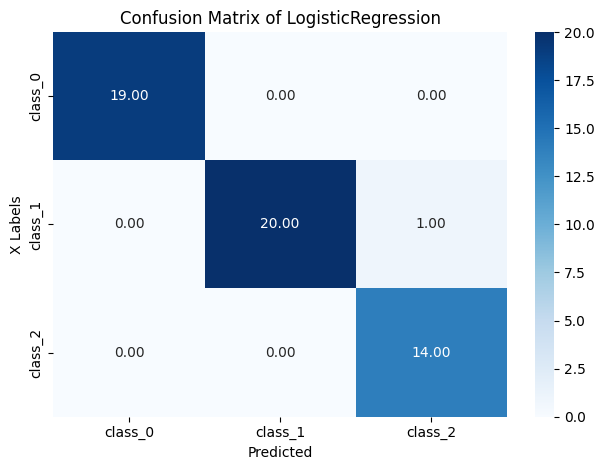

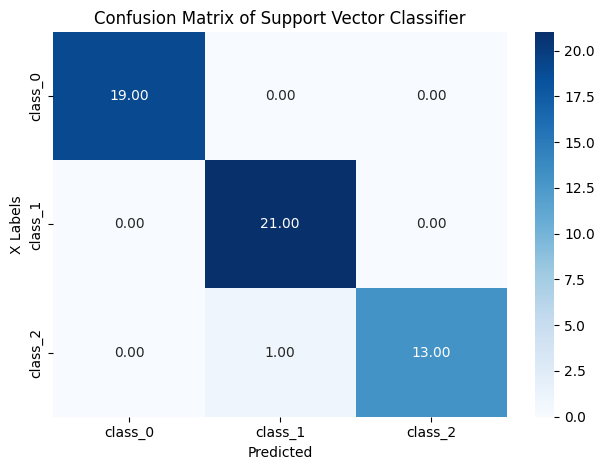

In [160]:
# Confusion matrix
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
    plt.title(f"Confusion Matrix of {name}")
    plt.xlabel("Predicted")
    plt.ylabel("X Labels")
    plt.tight_layout()
    plt.show()